# Regression logistique

## Importation des dépendances

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk 
import sklearn.datasets
import matplotlib.pyplot as plt
import pdb

## Création de la dataset

In [2]:
x_set, y_set = sk.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=4)

In [3]:
print(x_set.shape)
print(x_set[:5])

(100, 2)
[[11.563957    1.3389402 ]
 [10.06721983  4.08616331]
 [ 8.77253877  2.33030515]
 [10.12748869  5.32277484]
 [ 9.06439343  1.74115688]]


In [4]:
print(y_set.shape)
print(y_set[:10])

(100,)
[0 1 1 1 0 0 0 0 0 1]


## Affichage de la dataset

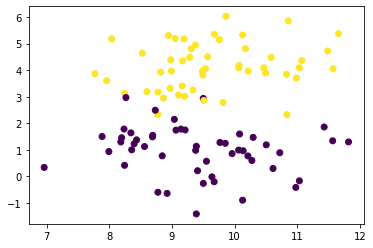

In [5]:
plt.scatter(x_set[:,0], x_set[:,1] , c=y_set)

## Création du perceptron 

Fonction du perceptron, celle-ci execute un produit matricielle qui éxécute la combinaison linéaire suivante:
$w_{1}*x_{1} + w_{2}*x_{2} + ... + w_{n}*x_{n}$

Pour cela on fait un produit matriciel avec la Matrice X pour les features de forme (100, 2) et la Matrice W pour les weights de forme (2, 1).

Donc $Z = X*W = w_{1}*x_{1} + w_{2}*x_{2} + ... + w_{n}*x_{n}$

Puis on passe le résultat dans une fonction d'activation noté par la variable "function_activation", dans notre cas ce sera la fonction sigmoid.
Ainsi on obtient à la fin de la fonction la valeur de function_activation(Z), ce qui réprente la sortie de perceptron.

La sortie, donc Z est de forme (100, 1)

In [6]:
def perceptron(X, W, B, function_activation):
    Z = X.dot(W) + B
    
    return function_activation(Z)

Fonction sigmoide, celle-ci execute la fonction mathématique suivante $A(Z) = \frac{1}{1 + \exp{(-Z)}}$.

La sortie est de forme (100, 1)

In [7]:
def sigmoid_function(Z):
    return 1 / ( 1 + np.exp(-Z))

La fonction d'erreur d'entropy croisée, celle-ci execute la fonction mathématique suivante $L = \frac{1}{m}\sum_{k=1}^{m}(-Y\log{(A)}-(1-Y)\log{(1-A)})$

La sortie est de forme(1,)

In [8]:
def cross_entropy_function(X, W, Y, function_activation):
    m = len(X)
    A = perceptron(X, W, B, function_activation)
    
    return 1/m * np.sum(-Y * np.log(A) - (1 - Y) * np.log(1 - A))

La fonction du gradient calcule le gradient de la fonction d'erreur, l'entropy croisé. Voici les calculs qu'elle effectue

$\frac{\partial{L}}{\partial{W}} = \frac{1}{m}\sum_{k=1}^{m}((A-Y)X)$

$\frac{\partial{L}}{\partial{B}} = \frac{1}{m}\sum_{k=1}^{m}(A-Y)$


In [9]:
def gradients(X, W, Y, B, function_activation):
    m = len(X)
    A = perceptron(X, W, B, function_activation)
    
    
    grads_W = 1/m * X.T.dot((A - Y))
    grads_B = 1/m * np.sum(A - Y)
    
    return (grads_W, grads_B)

Fonction de descente du gradient, cette fonction sera chargé d'appliquer la descente du gradient avec un coeficient alpha et un certain nombre d'itération noté it.

Celle-ci exécute les calculs suivants:

$W = W - alpha * \frac{\partial{L}}{\partial{W}}$

$B = B - alpha * \frac{\partial{L}}{\partial{B}}$

La fonction enrengistre aussi le résultat de l'erreur donnée par l'entropy croisée en fonction des itérations dans la "list_cost"

In [10]:
i = 0
list_it_cost = []

def gradient_descent(X, W, Y, B, i, function_activation, alpha, iteration):
    for it in range(iteration):
        grads_W, grads_B = gradients(X, W, Y, B, sigmoid_function)
        
        W = W - alpha * grads_W
        B = B - alpha * grads_B
        
        cost = cross_entropy_function(X, W, Y, sigmoid_function)
        list_it_cost.append([i, cost])
        
        i += 1  
        
    return (i, W, B)

## Création des vecteurs X et Y

### Vecteur X 

In [11]:
X = np.array(x_set)
X.shape

(100, 2)

### Vecteur W

In [12]:
W = np.random.randn(2, 1)


### Vecteur b

In [13]:
B = np.random.randn(1)

### Vecteur Y 

In [14]:
Y = np.array(y_set).reshape(100, 1)
Y.shape

(100, 1)

## Entrainement grâce à la descente du gradient

In [15]:
ALPHA = 0.1
ITERATION = 100

i, W_final, B_final = gradient_descent(X, W, Y, B, i, sigmoid_function, ALPHA, ITERATION)
print(W_final)

[[-0.56334528]
 [ 1.79894848]]


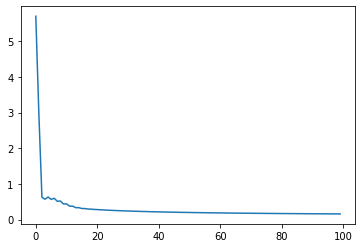

In [16]:
list_it, list_cost = list(zip(*list_it_cost))
plt.plot(list_it, list_cost)

## Tracer la frontières de décisions

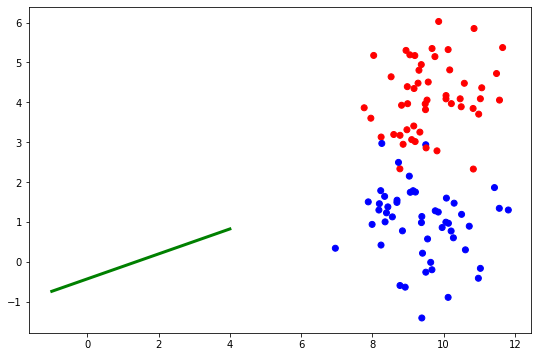

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y_set, cmap='bwr')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W_final[0] * x1 - B_final) / W_final[1]

ax.plot(x1, x2, c='g', lw=3)

## Tracer la frontières de décisions

In [18]:
def affichage(X, y, y_pred, resolution = 100):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

    #limites du graphique
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # meshgrid
    x1 = np.linspace(xlim[0], xlim[1], resolution)
    x2 = np.linspace(ylim[0], ylim[1], resolution)
    X1, X2 = np.meshgrid(x1, x2)

    # assembler les 2 variables
    XX = np.vstack((X1.ravel(), X2.ravel())).T

    # Prédictions
    Z = perceptron(XX, W_final, B_final, sigmoid_function) >= 0.5
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
    ax.contour(X1, X2, Z, colors='g')

/home/rangom/Documents/Programmation/Projets/Python/Machine Learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


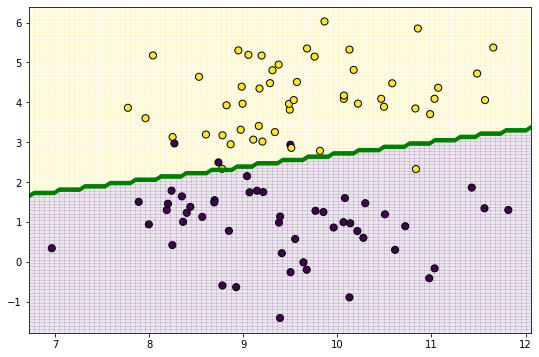

In [19]:
affichage(X, Y, Y == 1, resolution = 100)